# EDA in Pandas

# Exploratory Data Analysis (EDA) in Pandas

Exploratory Data Analysis is the crucial first step in any data science project. This notebook demonstrates systematic approaches to understanding your dataset through pandas operations. We'll explore:

- **Data Loading**: Reading and initial inspection
- **Data Understanding**: Structure, types, and basic statistics  
- **Data Quality Assessment**: Missing values and data integrity
- **Statistical Analysis**: Distributions, correlations, and patterns
- **Data Visualization**: Charts and plots for insights
- **Grouping and Aggregation**: Analyzing data by categories

## Key EDA Concepts

### Understanding Your Data Structure:
- **df.info()**: Data types, non-null counts, memory usage
- **df.describe()**: Statistical summary of numeric columns
- **df.isnull().sum()**: Missing value counts per column
- **df.nunique()**: Unique value counts for categorical analysis

### Statistical Analysis:
- **Correlation Analysis**: How variables relate to each other
- **Distribution Analysis**: Understanding data spread and outliers
- **Grouping Operations**: Analyzing data by categories

### Visualization Techniques:
- **Heatmaps**: Correlation visualization
- **Line Plots**: Trends over time/sequences
- **Box Plots**: Distribution and outlier detection

### Best Practices:
- Always start with data shape and types
- Check for missing values early
- Use appropriate visualizations for different data types
- Consider data quality before deep analysis

# Import Required Libraries

For comprehensive EDA, we need several libraries:

- **pandas**: Core data manipulation and analysis
- **seaborn**: Statistical data visualization (built on matplotlib)
- **matplotlib.pyplot**: Basic plotting functionality

These libraries provide the foundation for data exploration, statistical analysis, and visualization.

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Data

Reading data is the first step in EDA. We're using `pd.read_csv()` to load a world population dataset. The raw path format ensures compatibility across different operating systems.

After loading, we display the DataFrame to get our first look at:
- Column names and data types
- Number of rows and columns
- Initial data values and format
- Any obvious data quality issues

This initial inspection helps us understand the dataset structure and plan our analysis approach.

In [82]:
df = pd.read_csv(r'E:\PortfolioProjects\Python Project\learning pandas\world_population.csv')

df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.1,1.0,0.5
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.9,1.0,0.0
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.9,1.0,0.6
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.5,1.0,0.0
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.6,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.5,1.0,0.0
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.2,1.0,0.0
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8,1.0,0.4
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.6,1.0,0.2


# Configure Display Options

Large numbers in population data can be hard to read. `pd.set_option('display.float_format', lambda x: '%.1f' % x)` formats all float columns to show one decimal place, making the data more readable.

This is especially important for:
- Large population numbers (millions, billions)
- Percentage values
- Financial data
- Any numeric data where precision beyond one decimal isn't crucial for initial analysis

The lambda function `lambda x: '%.1f' % x` converts numbers like 1234567.89 to 1234567.9 for better readability.

In [83]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

# Understanding Data Structure with df.info()

`df.info()` provides a comprehensive overview of your DataFrame:

- **Column names**: What data you have
- **Non-null counts**: How complete your data is
- **Data types**: Whether columns are numeric, string, date, etc.
- **Memory usage**: How much RAM the data consumes

### Key insights from info():
- **Data Types**: Ensure numeric columns are actually numeric (not stored as strings)
- **Missing Values**: Compare total rows vs non-null counts to identify incomplete columns
- **Memory Usage**: Large datasets might need optimization
- **Column Count**: Understand the scope of your analysis

This method is essential for initial data assessment and planning your cleaning/preprocessing steps.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

# Statistical Summary with df.describe()

`df.describe()` provides a statistical overview of numeric columns:

- **count**: Number of non-null values
- **mean**: Average value
- **std**: Standard deviation (spread of data)
- **min/max**: Range of values
- **25%/50%/75%**: Quartiles (distribution percentiles)

### What to look for:
- **Unusual means**: Values that seem too high/low for the domain
- **High standard deviation**: Indicates wide data spread
- **Skewed distributions**: Large gaps between percentiles
- **Outliers**: Min/max values far from the mean

This summary helps identify data quality issues and understand the overall distribution of your numeric variables.

In [85]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.0,230.0,233.0,230.0,227.0,227.0,229.0,229.0,230.0,232.0,230.0,232.0,234.0
mean,117.5,34632250.9,33600711.0,32066004.2,30270164.5,26840495.3,19330463.9,16282884.8,15866499.1,581663.7,456.8,1.0,0.4
std,67.7,137889172.4,135873196.6,131507146.3,126074183.5,113352454.6,81309625.0,69345465.5,68355859.8,1769133.1,2083.7,0.0,1.7
min,1.0,510.0,520.0,564.0,596.0,651.0,700.0,733.0,752.0,1.0,0.0,0.9,0.0
25%,59.2,419738.5,406471.0,394295.0,382726.5,329470.0,261928.0,223752.0,145880.5,2567.2,36.6,1.0,0.0
50%,117.5,5762857.0,5456681.0,5244415.0,4889741.0,4491202.0,3785847.0,3135123.0,2511718.0,77141.0,95.3,1.0,0.1
75%,175.8,22653719.0,21522626.0,19730853.8,16825852.5,15625467.0,11882762.0,9817257.0,8817329.0,414643.2,236.9,1.0,0.3
max,234.0,1425887337.0,1424929781.0,1393715448.0,1348191368.0,1264099069.0,1153704252.0,982372466.0,822534450.0,17098242.0,23172.3,1.1,17.9


# Assessing Missing Values

`df.isnull().sum()` counts missing values in each column. Understanding the extent and pattern of missing data is crucial for:

### Data Quality Assessment:
- **Complete columns**: No missing values
- **Partially missing**: Some missing values that might need imputation
- **Heavily missing**: Columns with high missing rates that might need removal

### Missing Data Patterns:
- **Random missing**: No clear pattern
- **Systematic missing**: Missing in specific conditions
- **Not missing at random**: Missingness related to the value itself

### Next Steps Based on Missing Data:
- **<5% missing**: Often safe to drop or impute
- **5-20% missing**: Consider imputation strategies
- **>20% missing**: May need to drop column or collect more data

Missing value analysis guides your data cleaning and preprocessing decisions.

In [86]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

# Analyzing Unique Values

`df.nunique()` shows the number of unique values in each column. This helps understand:

### Categorical Variables:
- **Low uniqueness**: Few distinct categories (good for grouping)
- **High uniqueness**: Many distinct values (may be IDs or continuous)

### Data Quality Indicators:
- **Unexpected uniqueness**: Text columns with too many/few unique values
- **ID columns**: Usually high uniqueness (one per row)
- **Categorical columns**: Usually low uniqueness (repeated categories)

### Analysis Planning:
- **Grouping candidates**: Columns with moderate uniqueness
- **Feature engineering**: High uniqueness might indicate need for binning
- **Data integrity**: Check if unique counts make sense for the domain

This information guides your categorical data analysis and feature engineering approaches.

In [87]:
df.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

# Sorting and Ranking Data

`df.sort_values(by='2022 Population', ascending=False).head(10)` sorts the DataFrame by population and shows the top 10 countries.

### Sorting Operations:
- **by parameter**: Column(s) to sort by
- **ascending**: Sort order (True for ascending, False for descending)
- **head()**: Limit results to first N rows

### Analysis Applications:
- **Top/bottom performers**: Largest/smallest values
- **Ranking analysis**: Understanding relative positions
- **Data exploration**: Quick identification of extremes

### Multiple Column Sorting:
```python
df.sort_values(by=['Continent', '2022 Population'], ascending=[True, False])
```

In [88]:
df.sort_values(by='2022 Population', ascending=False).head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337.0,1424929781.0,1393715448.0,1348191368.0,1264099069.0,1153704252.0,982372466.0,822534450.0,9706961.0,146.9,1.0,17.9
92,2,IND,India,New Delhi,Asia,1417173173.0,1396387127.0,1322866505.0,1240613620.0,1059633675.0,NaN,NaN,557501301.0,3287590.0,431.1,1.0,17.8
221,3,USA,United States,"Washington, D.C.",North America,338289857.0,335942003.0,324607776.0,311182845.0,282398554.0,248083732.0,223140018.0,200328340.0,9372610.0,36.1,1.0,4.2
93,4,IDN,Indonesia,Jakarta,Asia,275501339.0,271857970.0,259091970.0,244016173.0,214072421.0,182159874.0,148177096.0,115228394.0,1904569.0,144.7,1.0,3.5
156,5,PAK,Pakistan,Islamabad,Asia,235824862.0,227196741.0,210969298.0,194454498.0,154369924.0,115414069.0,80624057.0,59290872.0,881912.0,267.4,1.0,3.0
149,6,NGA,Nigeria,Abuja,Africa,218541212.0,208327405.0,183995785.0,160952853.0,122851984.0,95214257.0,72951439.0,55569264.0,923768.0,236.6,1.0,2.7
27,7,BRA,Brazil,Brasilia,South America,215313498.0,213196304.0,205188205.0,196353492.0,175873720.0,150706446.0,122288383.0,96369875.0,8515767.0,25.3,1.0,2.7
16,8,BGD,Bangladesh,Dhaka,Asia,171186372.0,167420951.0,157830000.0,148391139.0,129193327.0,107147651.0,83929765.0,67541860.0,147570.0,1160.0,1.0,2.1
171,9,RUS,Russia,Moscow,Europe,144713314.0,145617329.0,144668389.0,143242599.0,146844839.0,148005704.0,138257420.0,130093010.0,17098242.0,8.5,1.0,1.8
131,10,MEX,Mexico,Mexico City,North America,127504125.0,125998302.0,120149897.0,112532401.0,97873442.0,81720428.0,67705186.0,50289306.0,1964375.0,64.9,1.0,1.6


# Correlation Analysis

`df.corr(numeric_only=True)` computes the correlation matrix for numeric columns. Correlation measures how strongly variables are related:

### Correlation Values:
- **+1.0**: Perfect positive correlation
- **0.0**: No correlation
- **-1.0**: Perfect negative correlation

### Interpretation:
- **Strong correlation (|r| > 0.7)**: Variables move together
- **Moderate correlation (0.3 < |r| < 0.7)**: Some relationship
- **Weak correlation (|r| < 0.3)**: Little to no relationship

### Key Insights:
- **Population columns**: Should be highly correlated (temporal progression)
- **Area vs Population**: May show moderate correlation
- **Unexpected correlations**: Could indicate data issues or interesting patterns

The `numeric_only=True` parameter ensures only numeric columns are included, avoiding errors with string data.

In [89]:
df.corr(numeric_only=True)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.0,-0.4,-0.4,-0.4,-0.4,-0.3,-0.3,-0.3,-0.3,-0.4,0.1,-0.2,-0.4
2022 Population,-0.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.0,1.0
2020 Population,-0.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.0,1.0
2015 Population,-0.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.0,1.0
2010 Population,-0.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.0,1.0
2000 Population,-0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.1,1.0
1990 Population,-0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.1,1.0
1980 Population,-0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.1,1.0
1970 Population,-0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.1,1.0
Area (km²),-0.4,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,-0.1,-0.0,0.5


# Visualizing Correlations with Heatmap

`sns.heatmap(df.corr(numeric_only=True), annot=True)` creates a visual correlation matrix:

### Heatmap Components:
- **Colors**: Lighter colors indicate stronger correlations
- **Annotations**: Numbers show exact correlation values
- **annot=True**: Displays correlation coefficients on the heatmap

### Visualization Settings:
- **plt.rcParams['figure.figsize'] = (20,7)**: Sets figure size for better readability
- **plt.show()**: Displays the plot

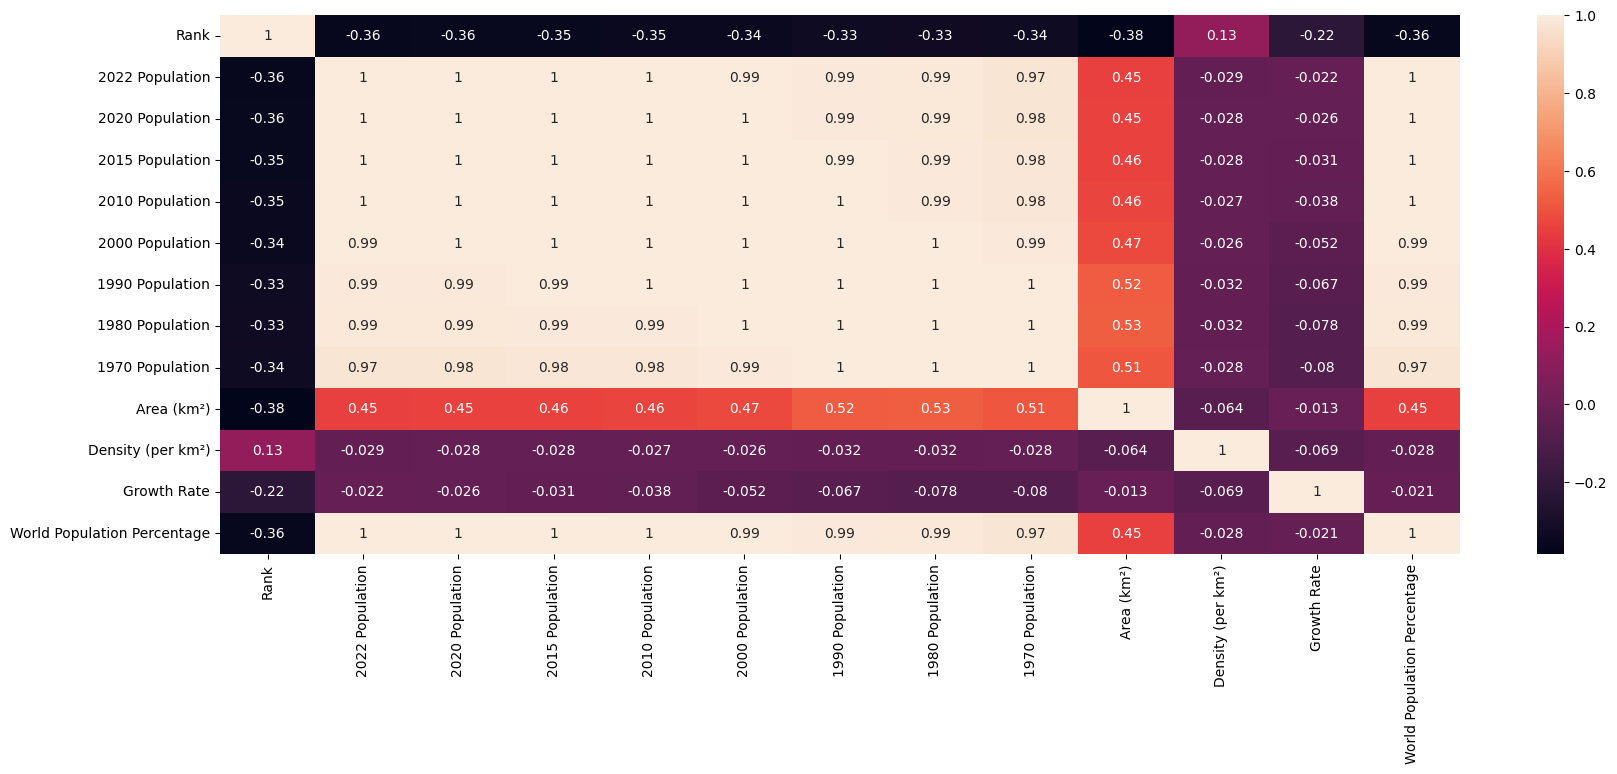

In [90]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

plt.rcParams['figure.figsize']= (20,7)

plt.show()

# GroupBy Operations for Categorical Analysis

`df.groupby('Continent').mean(numeric_only=True)` groups data by continent and calculates averages. This reveals:

### GroupBy Process:
1. **Split**: Data divided by unique values in grouping column
2. **Apply**: Aggregation function applied to each group
3. **Combine**: Results combined into new DataFrame

### Analysis Insights:
- **Continent comparison**: Which continents have highest/lowest populations
- **Regional patterns**: Understanding geographic distribution
- **Data aggregation**: Summarizing detailed data by categories

### Key Parameters:
- **numeric_only=True**: Ensures only numeric columns are aggregated
- **sort_values()**: Orders results by population for better insights

GroupBy operations are essential for understanding how data varies across different categories or groups.

In [91]:
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.1,1.0,0.5
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.9,1.0,0.0
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.9,1.0,0.6
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.5,1.0,0.0
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.6,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.5,1.0,0.0
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.2,1.0,0.0
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8,1.0,0.4
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.6,1.0,0.2


In [92]:
df.groupby('Continent').mean(numeric_only=True).sort_values(by='2022 Population', ascending=False)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Asia,77.6,96327387.3,94955134.4,89165003.6,89087770.0,80580835.1,48639995.3,40278333.3,43839877.8,642762.8,1025.0,1.0,1.2
South America,97.6,31201186.3,30823574.5,29509599.7,26789395.5,25015888.7,21224743.9,17270643.3,13781939.7,1301302.8,21.0,1.0,0.4
Africa,92.2,25455879.7,23871435.3,21419703.6,18898197.3,14598365.9,11376964.5,8586032.0,6567175.3,537879.3,126.4,1.0,0.3
Europe,124.5,15055371.8,14915843.9,15027454.1,14712278.7,14817685.7,14785203.9,14200004.5,13118479.8,460208.2,663.3,1.0,0.2
North America,160.9,15007403.4,14855914.8,14259596.2,13568016.3,12151739.6,10531660.6,9207334.0,7885865.2,606104.4,272.5,1.0,0.2
Oceania,188.5,2046386.3,1910149.0,1756664.5,1613163.7,1357512.1,1162774.9,996532.2,846968.3,370220.9,132.5,1.0,0.0


# Filtering Data with String Methods

`df[df['Continent'].str.contains('Oceania')]` filters for countries in Oceania. String methods provide powerful filtering capabilities:

### String Filtering Techniques:
- **str.contains()**: Check if string contains substring
- **str.startswith()**: Check if string starts with pattern
- **str.endswith()**: Check if string ends with pattern
- **str.match()**: Match against regular expressions

### Filtering Applications:
- **Geographic analysis**: Filter by continent, region, or country groups
- **Text pattern matching**: Find records with specific characteristics
- **Data subsetting**: Focus analysis on specific categories

### Boolean Indexing:
The `df[condition]` syntax creates filtered views of your data, allowing focused analysis on subsets of interest.

Filtering is essential for drilling down into specific segments of your data for detailed analysis.

In [93]:
df[df['Continent'].str.contains('Oceania')]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.5,1.0,0.0
11,55,AUS,Australia,Canberra,Oceania,26177413.0,25670051.0,23820236.0,22019168.0,19017963.0,17048003.0,14706322.0,12595034.0,7692024.0,3.4,1.0,0.3
44,223,COK,Cook Islands,Avarua,Oceania,17011.0,17029.0,17695.0,17212.0,15897.0,17123.0,17651.0,20470.0,236.0,72.1,1.0,0.0
66,162,FJI,Fiji,Suva,Oceania,929766.0,920422.0,917200.0,905169.0,832509.0,780430.0,644582.0,527634.0,18272.0,50.9,1.0,0.0
70,183,PYF,French Polynesia,Papeete,Oceania,306279.0,301920.0,291787.0,283788.0,250927.0,211089.0,163591.0,117891.0,4167.0,73.5,1.0,0.0
81,191,GUM,Guam,Hagåtña,Oceania,171774.0,169231.0,167978.0,164905.0,160188.0,138263.0,110286.0,88300.0,549.0,312.9,1.0,0.0
107,192,KIR,Kiribati,Tarawa,Oceania,131232.0,126463.0,116707.0,107995.0,88826.0,75124.0,60813.0,57437.0,811.0,161.8,1.0,0.0
126,215,MHL,Marshall Islands,Majuro,Oceania,41569.0,43413.0,49410.0,53416.0,54224.0,46047.0,31988.0,23969.0,181.0,229.7,1.0,0.0
132,194,FSM,Micronesia,Palikir,Oceania,114164.0,112106.0,109462.0,107588.0,111709.0,98603.0,76299.0,58989.0,702.0,162.6,1.0,0.0
142,225,NRU,Nauru,Yaren,Oceania,12668.0,12315.0,11185.0,10241.0,10377.0,9598.0,7635.0,6663.0,21.0,603.2,1.0,0.0


# Advanced GroupBy with Column Selection

`df.groupby('Continent')[population_columns].mean(numeric_only=True)` demonstrates advanced GroupBy techniques:

### Column Selection in GroupBy:
- **Specific columns**: Select only relevant columns for aggregation
- **List of columns**: `[['1970 Population', '1980 Population', ...]]`
- **Column ranges**: Use slicing or list comprehensions

### Data Transformation Benefits:
- **Focused analysis**: Only aggregate relevant numeric columns
- **Performance**: Reduce memory usage by excluding unnecessary columns
- **Clarity**: Results show only the data you need

In [94]:
df2 = df.groupby('Continent')[['1970 Population', '1980 Population', '1990 Population',
       '2000 Population', '2010 Population', '2020 Population',
       '2022 Population']].mean(numeric_only=True).sort_values(by='2022 Population', ascending=False)

# Time Series Visualization

`df3.plot()` creates line plots showing population trends over time:

### Pandas Plotting Features:
- **Automatic indexing**: Uses DataFrame index for x-axis
- **Multiple series**: Each column becomes a separate line
- **Default styling**: Clean, readable plots out of the box

### Visualization Insights:
- **Growth patterns**: How continents' populations have changed over decades
- **Relative comparisons**: Which continents have grown fastest
- **Historical trends**: Population evolution from 1970 to 2022

### Plot Customization:
- **Colors**: Automatic color assignment for different continents
- **Legends**: Automatic legend generation
- **Grid lines**: Default grid for better readability

Pandas plotting provides quick, effective visualizations directly from your DataFrame without complex setup.

In [95]:
df3 = df2.transpose()

# Data Transformation with Transpose

`df2.transpose()` flips the DataFrame orientation:

### Transpose Operations:
- **Rows become columns**: Continent names become column headers
- **Columns become rows**: Population years become row indices
- **Data restructuring**: Changes analysis perspective

### Analysis Benefits:
- **Time series view**: Years as rows, continents as columns
- **Comparative plotting**: Easy to plot multiple continents over time
- **Data reshaping**: Prepare data for different visualization approaches

### When to Transpose:
- **Time series analysis**: When time periods should be on the x-axis
- **Comparative visualization**: When comparing multiple categories
- **Data export**: Different formats require different orientations

Transpose is a powerful tool for changing how you view and analyze your data.

<Axes: >

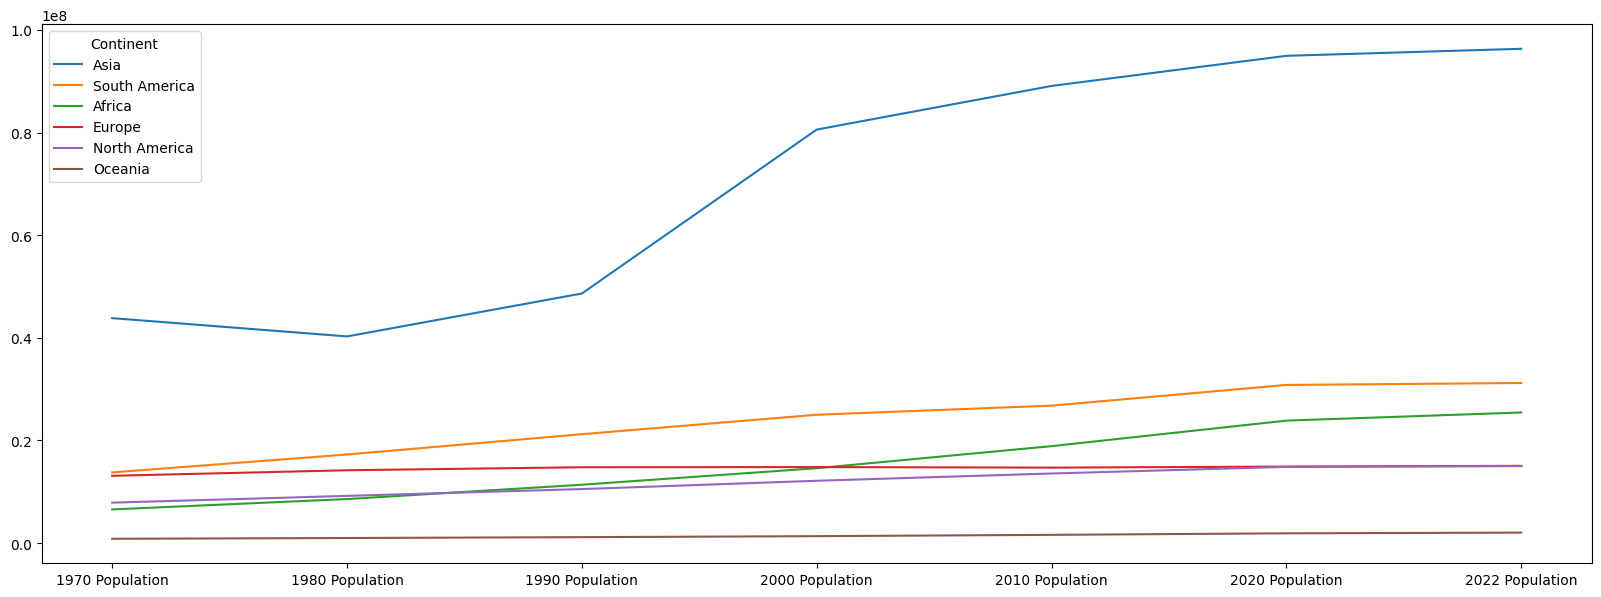

In [96]:
df3.plot()

# Distribution Analysis with Box Plots

`df.boxplot(figsize=(20,8))` creates box plots for all numeric columns:

### Box Plot Components:
- **Box**: Shows interquartile range (IQR) - middle 50% of data
- **Line in box**: Median value
- **Whiskers**: Range of non-outlier data (typically 1.5 * IQR)
- **Points**: Outliers beyond the whiskers

### Analysis Applications:
- **Distribution shape**: Understanding data spread and central tendency
- **Outlier detection**: Identifying unusual values
- **Comparative analysis**: How different variables compare in scale and distribution

### Key Insights:
- **Population scales**: Vast differences between continents
- **Data spread**: How variable population data is across countries
- **Outliers**: Countries with exceptionally high or low populations

### figsize Parameter:
- **figsize=(20,8)**: Creates a wide, readable plot
- **Width**: Accommodates many columns
- **Height**: Provides clear visualization

Box plots are excellent for understanding data distributions and identifying potential data quality issues.

<Axes: >

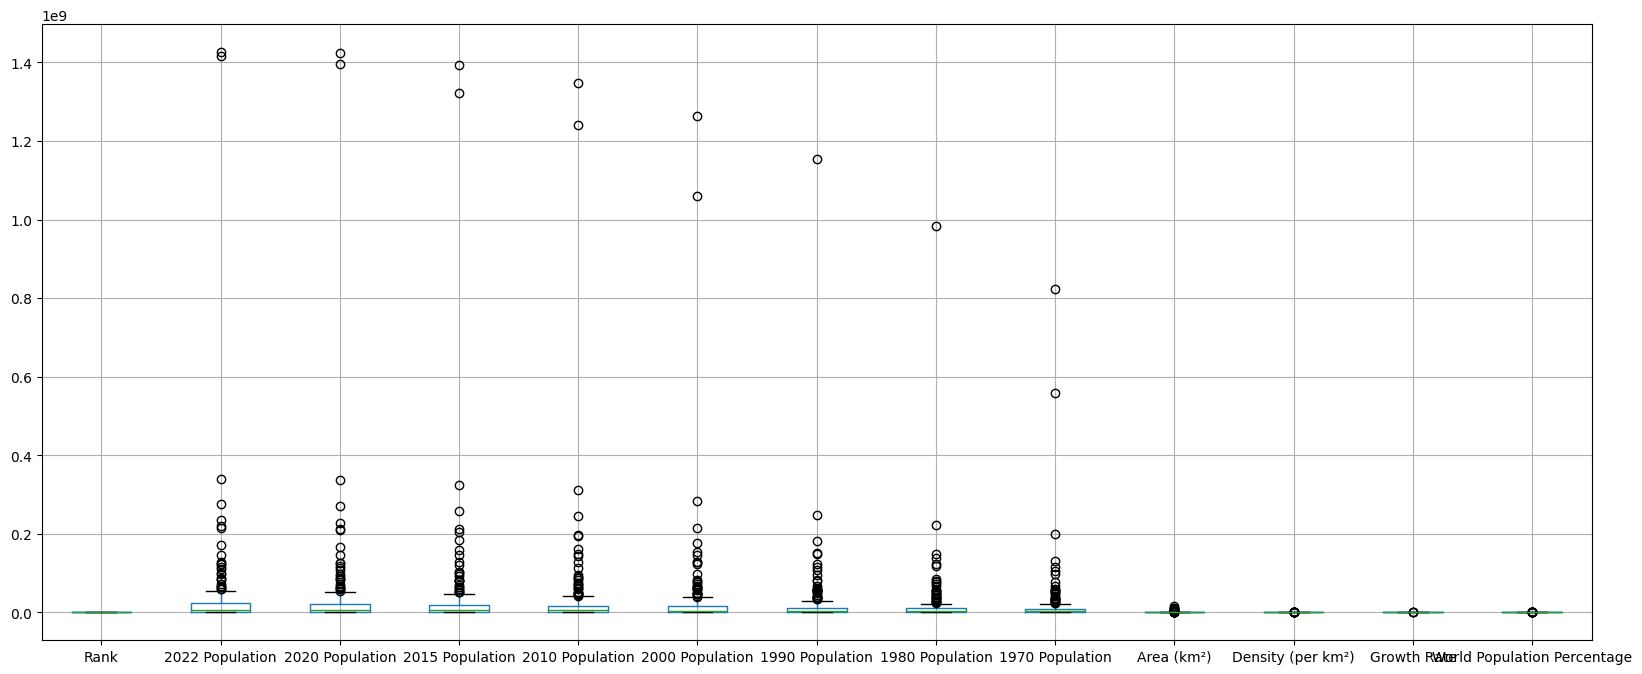

In [97]:
df.boxplot(figsize=(20,8))

# Data Types Analysis

`df.dtypes` shows the data type of each column. Understanding data types is crucial for:

### Data Type Categories:
- **object**: Usually strings/text data
- **int64**: Integer numbers
- **float64**: Decimal numbers
- **datetime64**: Date/time data
- **bool**: True/False values

### Analysis Implications:
- **Numeric operations**: Only work on int/float columns
- **String operations**: Only work on object columns
- **Memory optimization**: Choosing appropriate data types
- **Data quality**: Ensuring types match expected values

### Common Issues:
- **Numbers as strings**: Can't perform mathematical operations
- **Dates as strings**: Can't use date functions
- **Mixed types**: Can cause unexpected behavior

Data type verification ensures your analysis operations will work correctly.

In [98]:
df.dtypes

Rank                             int64
CCA3                            object
Country                         object
Capital                         object
Continent                       object
2022 Population                float64
2020 Population                float64
2015 Population                float64
2010 Population                float64
2000 Population                float64
1990 Population                float64
1980 Population                float64
1970 Population                float64
Area (km²)                     float64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

# Selecting Columns by Data Type

`df.select_dtypes(include='float')` filters columns by data type. This is useful for:

### Data Type Selection:
- **include**: Columns to include (by type)
- **exclude**: Columns to exclude (by type)
- **Specific types**: 'float', 'int', 'object', 'datetime', etc.

### Analysis Applications:
- **Numeric analysis**: Focus on mathematical columns only
- **Text analysis**: Work with string columns separately
- **Data preparation**: Prepare data for specific operations

### Common Patterns:
```python
# Select only numeric columns
df.select_dtypes(include=['int', 'float'])

# Select only text columns
df.select_dtypes(include='object')

# Exclude certain types
df.select_dtypes(exclude='object')
```

This method helps you work with specific data types for targeted analysis and preprocessing.

In [99]:
df.select_dtypes(include='float')

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.1,1.0,0.5
1,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.9,1.0,0.0
2,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.9,1.0,0.6
3,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.5,1.0,0.0
4,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.6,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.5,1.0,0.0
230,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.2,1.0,0.0
231,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8,1.0,0.4
232,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.6,1.0,0.2
